### Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

In [5]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df_test.shape

(233599, 11)

In [7]:
# Merging the train and test data
df = pd.concat([df_train, df_test],ignore_index=True)
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
472053,1000749,P00218742,M,36-45,18,B,0,0,5,NaN,NaN,7111.0
530637,1003735,P00064742,M,26-35,0,B,0,0,8,NaN,NaN,7844.0
502654,1005441,P00187442,M,51-55,7,C,0,1,2,4.0,5.0,12910.0
489372,1003447,P00334242,M,26-35,12,B,0,0,1,8.0,NaN,15482.0
325544,1002069,P00042742,M,55+,15,C,4+,1,5,14.0,NaN,7112.0
162952,1001184,P00191442,F,26-35,4,C,1,1,1,2.0,15.0,8100.0
457805,1004446,P00110742,M,18-25,18,B,1,1,1,2.0,8.0,18960.0
326228,1002173,P00313542,M,51-55,13,C,1,0,5,8.0,NaN,8828.0
482455,1002230,P00042342,F,46-50,1,B,4+,1,8,16.0,NaN,6085.0
344545,1005035,P00062842,F,26-35,17,B,1,1,1,2.0,13.0,15201.0


In [8]:
df.shape

(783667, 12)

In [9]:
df.drop(['User_ID'], axis=1, inplace=True)

In [10]:
# Handling categorical features: Gender
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# Handling categorical features: Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# Using target ordinal encoding
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [14]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN
783666,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN


In [15]:
# Handling categorical features: City
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [17]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [18]:
df = pd.concat([df, df_city], axis=1)
df.drop('City_Category', axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


#### Missing Values

In [19]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
print('Uniques in Product_category_2 are: ', df['Product_Category_2'].unique())

Uniques in Product_category_2 are:  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [21]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [22]:
df['Product_Category_2'].value_counts().sum()

537685

In [23]:
print('Uniques in Product_category_3 are: ', df['Product_Category_3'].unique())

Uniques in Product_category_3 are:  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [24]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [25]:
df['Product_Category_3'].value_counts().sum()

237858

**Since product categories are discrete categorical values. We can replace missing values by mode of the sample.**

In [26]:
df['Product_Category_2'].mode()[0]

8.0

In [27]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [28]:
df['Product_Category_2'].isnull().sum()

0

In [29]:
df['Product_Category_3'].mode()[0]

16.0

In [30]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [31]:
df['Product_Category_3'].isnull().sum()

0

In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [35]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [36]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 55.

In [38]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [39]:
df = df.drop('Product_ID', axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 56.8 MB


#### Visualization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

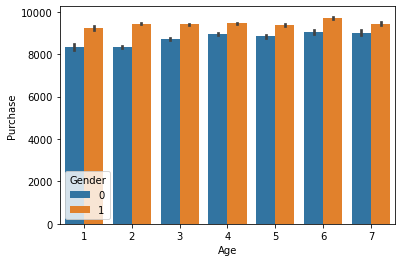

In [41]:
# Visualization of Purchase with respect to gender and age
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

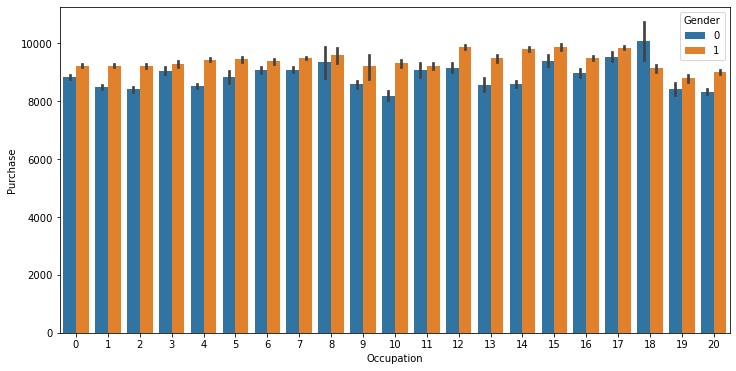

In [42]:
# Visualization of Purchase with respect to occupation
plt.figure(figsize=(12,6))
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

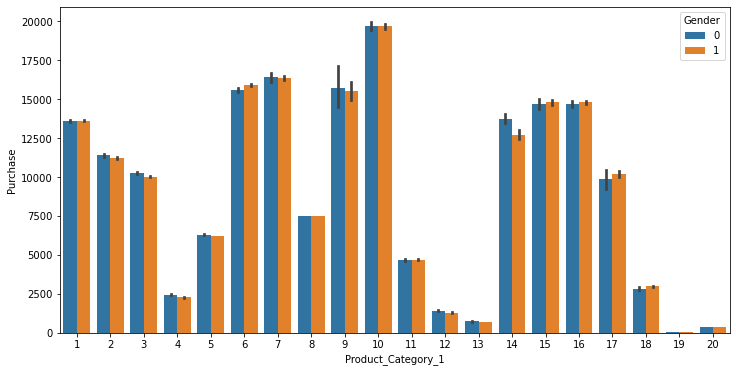

In [43]:
# Visualization of Purchase with respect to product category
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

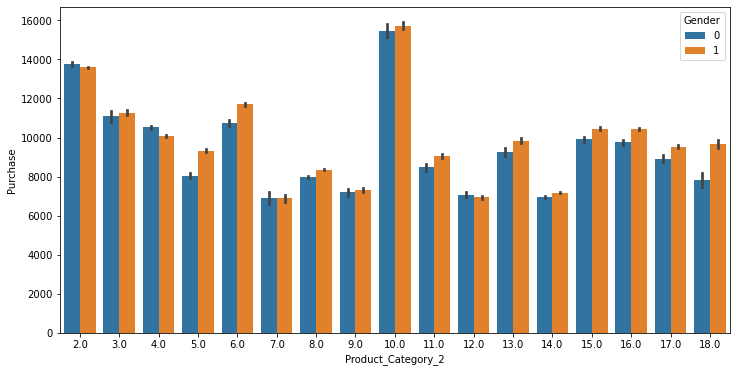

In [44]:
# Visualization of Purchase with respect to product category
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

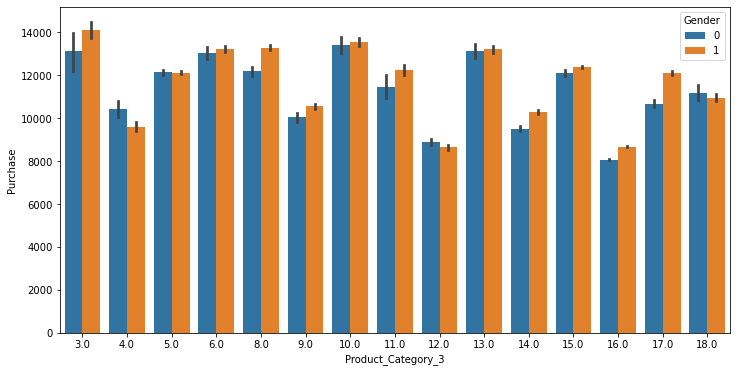

In [45]:
# Visualization of Purchase with respect to product category
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

#### Feature Scaling

In [46]:
df_test = df[df['Purchase'].isnull()]

In [47]:
df_train = df[~df['Purchase'].isnull()]

In [48]:
df_test.shape

(233599, 11)

In [49]:
df_train.shape

(550068, 11)

In [50]:
df_train.tail()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550063,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0,1
550067,0,5,0,4,1,20,8.0,16.0,490.0,1,0


In [51]:
X = df_train.drop(['Purchase'], axis=1)
y = df_train['Purchase']

In [52]:
X = X.head(100)
#X

In [53]:
y = y.head(100)
#y

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67, 10)
(33, 10)
(67,)
(33,)


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
# Ready to train the model 
from sklearn.ensemble import RandomForestRegressor

Rand_FR = RandomForestRegressor(n_estimators=100, n_jobs=-1)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

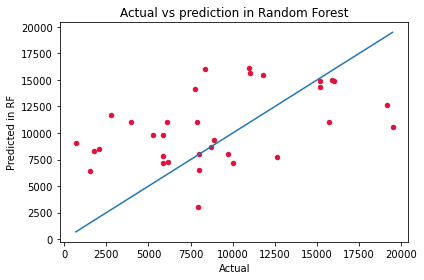

In [59]:
# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred_rf, s=20, c='crimson')
plt.title('Actual vs prediction in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [60]:
# Predicting the accuracy score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_pred_rf)

In [61]:
print('r2_score is: ', score)

r2_score is:  0.07751455920747585


In [62]:
print('mean_squared_error is: ', mean_squared_error(y_test, y_pred_rf))

mean_squared_error is:  22822143.75433029


In [63]:
print('root_mean_squared_error is: ', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

root_mean_squared_error is:  4777.252741307528


In [64]:
output = pd.DataFrame({'Index': y_test, 'Class': y_pred_rf})
output

,Index,Class
83,8011.0,6511.663333
53,15912.0,14954.505000
70,1780.0,8296.605262
45,10007.0,7136.863595
44,12642.0,7727.087333
39,15705.0,11053.640000
22,9743.0,8056.886667
80,697.0,9059.742500
10,5254.0,9818.935000
0,8370.0,16008.235000
